In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#here, pandas is used for data manipulation and analysis.
#numpy is used for numerical operations.
#matplotlib and seaborn are used for data visualization.

In [2]:
df=pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handlerate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
df["rate"]=df["rate"].apply(handlerate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


#coverted data type of the "rate" column to float and remove the denominator.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#there is no null value in dataframe.

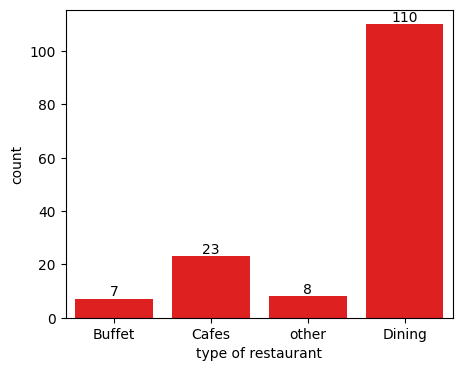

In [9]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x=df["listed_in(type)"],data=df,color="red")
ax.bar_label(ax.containers[0])
plt.xlabel("type of restaurant")
plt.show()

#the majority of the restaurants fall into the dining category.

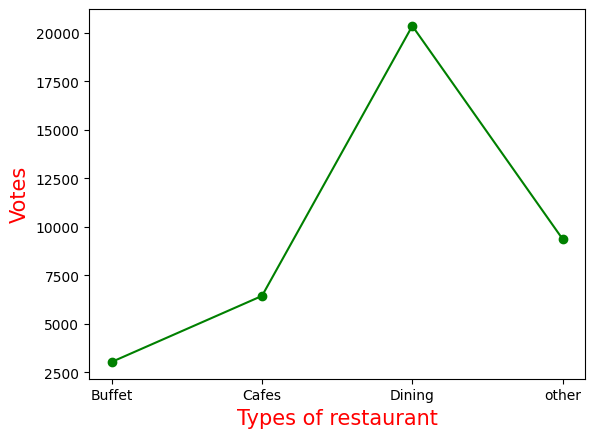

In [16]:
grouped_data= df.groupby("listed_in(type)")["votes"].sum()
result= pd.DataFrame({"votes":grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Types of restaurant", c="red", size=15)
plt.ylabel("Votes", c="red", size=15)
plt.show()

#the majority of restaurants received rating.

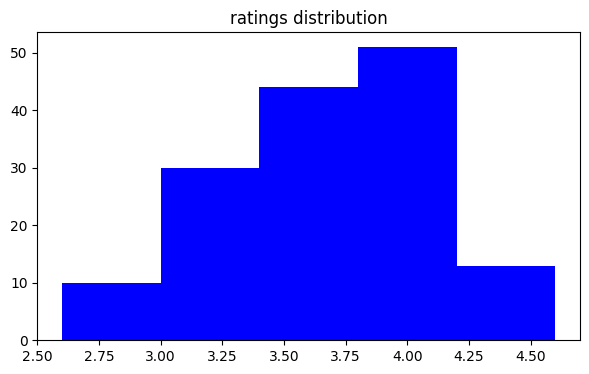

In [20]:
plt.figure(figsize=(7,4))
plt.hist(df["rate"],bins=5, color="blue")
plt.title("ratings distribution")
plt.show()

#the majority of restaurants received rating from 3.5 to 4.

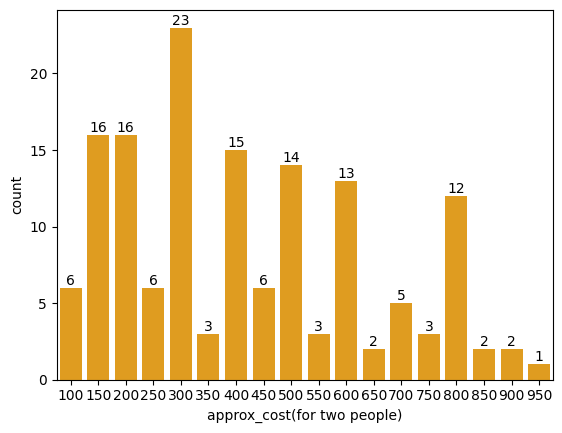

In [32]:
couple_data=df["approx_cost(for two people)"]
ax=sns.countplot(x=couple_data, data=df, color="orange")
ax.bar_label(ax.containers[0])
plt.show()

#the majority of couples prefer restaurants with an approximate cost of 300 rupees.

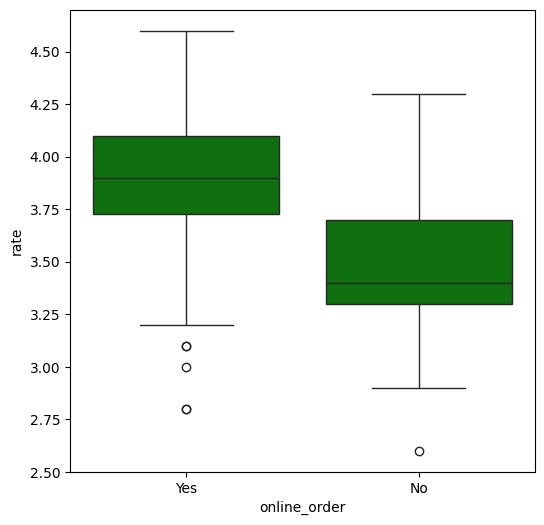

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=df, color="green")
plt.show()

#offline orders received lower rating in comparison to online orders, which obtained excellent ratings.

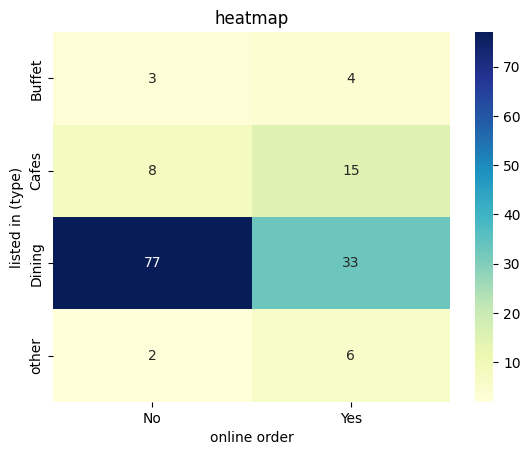

In [30]:
pivot_table=df.pivot_table(index="listed_in(type)",columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot= True, cmap="YlGnBu", fmt="d")
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed in (type)")
plt.show()

#dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders. this suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.